<a href="https://colab.research.google.com/github/devrihartle/devrihartle.github.io/blob/master/Final_Unit_1_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

I hypothesize that there is a relationship between unemployment and overall mental illness in the following year. 

In [1]:
from google.colab import files
uploaded = files.upload()

Saving all_data.csv to all_data.csv


In [3]:
import pandas as pd
df = pd.read_csv('all_data.csv')
df.head()

,Unnamed: 0,COUNTRIES,Healthcare_2016 ($ per capita),Population_2017,HDI_2016,GINI_year,Unemploy_2016 (%),Combined_2017 (%),ASD_2017 (%),ADHD_2017 (%),DEP_2017 (%),SCZ_2017 (%),ANX_2017 (%),ED_2017 (%),ETOH_2017 (%),SUICIDE_2017 (per 100.000),BD_2017 (%)
0,1,AUS,4565.873,24585000,0.938,0.330,5.710301,18.381283,0.636245,2.530677,4.623881,0.363326,6.584301,0.943081,1.511935,11.046885,1.142097
1,2,AUT,5139.924,8820000,0.906,0.284,6.014071,14.362136,0.624750,1.029146,3.260970,0.256958,5.341275,0.675112,1.824065,11.202157,0.939794
2,3,BEL,4666.226,11420000,0.915,0.266,7.833329,15.018094,0.627004,1.034081,4.109186,0.258073,5.212645,0.603869,1.465639,14.275319,0.947159
3,4,CAN,4698.016,36732000,0.922,0.307,6.991667,15.508529,0.935486,1.381819,3.988792,0.315588,5.178218,0.477304,1.617937,10.905195,0.716413
4,5,CZE,2627.698,10641000,0.885,0.253,3.952049,11.350703,0.478151,1.036547,2.675387,0.209989,3.443601,0.242373,2.097172,10.766628,0.721570


For clarification, Unemploy_2016 is the percentage of people unemployed per 100,000. Combined_2017 is the percentage of people in each population that have any type of mental disorder.

In [5]:
#look at the shape of the data
df.shape

(36, 17)

It is a smaller dataset but will hopefully be helpful in establishing some patterns.

In [6]:
df.describe()

,Unnamed: 0,Healthcare_2016 ($ per capita),Population_2017,HDI_2016,GINI_year,Unemploy_2016 (%),Combined_2017 (%),ASD_2017 (%),ADHD_2017 (%),DEP_2017 (%),SCZ_2017 (%),ANX_2017 (%),ED_2017 (%),ETOH_2017 (%),SUICIDE_2017 (per 100.000),BD_2017 (%)
count,36.000000,36.000000,3.600000e+01,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000
mean,18.500000,3715.241694,3.595889e+07,0.892389,0.316750,7.406476,14.278099,0.603271,1.151781,3.705423,0.256247,4.934455,0.483357,1.842375,10.891284,0.863389
std,10.535654,1804.321309,6.013667e+07,0.042662,0.053736,4.202450,2.132497,0.115969,0.400166,0.646408,0.046424,1.456236,0.175060,0.991349,4.751981,0.151460
min,1.000000,1065.875000,3.340000e+05,0.772000,0.241000,2.968629,10.869710,0.355781,0.427186,2.250472,0.199510,2.937224,0.225275,0.462937,3.310770,0.569459
25%,9.750000,2195.374750,5.410000e+06,0.866000,0.283500,4.852488,12.160995,0.482008,1.025982,3.329145,0.211695,3.459470,0.314967,1.330652,8.622281,0.715418
50%,18.500000,3747.734500,1.042900e+07,0.903000,0.305500,6.233386,14.753639,0.625275,1.037534,3.802066,0.256598,5.285633,0.517573,1.730164,10.452796,0.890852
75%,27.250000,4777.175750,4.775925e+07,0.923500,0.346000,8.484154,15.573777,0.645461,1.190555,4.125457,0.265593,5.802444,0.574129,2.108007,12.863054,0.955047
max,36.000000,9903.651000,3.250850e+08,0.951000,0.458000,23.541040,18.712421,0.935486,2.530677,4.835610,0.363326,8.539931,0.943081,4.713617,27.990584,1.206088


One of the first things I noticed was that the unemployment average per 100,000 was 7.4 % but that the max for unemployment was 23.5 percent. This stood out to me, I will take a look at it later. 
As far as combined mental illness prevalence, it looks like the average is about 14% of each population. 

In [7]:
#check for null values
df.isnull().sum()

Unnamed: 0                        0
COUNTRIES                         0
Healthcare_2016 ($ per capita)    0
Population_2017                   0
HDI_2016                          0
GINI_year                         0
Unemploy_2016 (%)                 0
Combined_2017 (%)                 0
ASD_2017 (%)                      0
ADHD_2017 (%)                     0
DEP_2017 (%)                      0
SCZ_2017 (%)                      0
ANX_2017 (%)                      0
ED_2017 (%)                       0
ETOH_2017 (%)                     0
SUICIDE_2017 (per 100.000)        0
BD_2017 (%)                       0
dtype: int64

No null values. 

In [8]:
#im going to drop the unnamed ID column since it isn't necessary 
clear_df=df.drop(['Unnamed: 0'], axis=1)
clear_df

,COUNTRIES,Healthcare_2016 ($ per capita),Population_2017,HDI_2016,GINI_year,Unemploy_2016 (%),Combined_2017 (%),ASD_2017 (%),ADHD_2017 (%),DEP_2017 (%),SCZ_2017 (%),ANX_2017 (%),ED_2017 (%),ETOH_2017 (%),SUICIDE_2017 (per 100.000),BD_2017 (%)
0,AUS,4565.873,24585000,0.938,0.330,5.710301,18.381283,0.636245,2.530677,4.623881,0.363326,6.584301,0.943081,1.511935,11.046885,1.142097
1,AUT,5139.924,8820000,0.906,0.284,6.014071,14.362136,0.624750,1.029146,3.260970,0.256958,5.341275,0.675112,1.824065,11.202157,0.939794
2,BEL,4666.226,11420000,0.915,0.266,7.833329,15.018094,0.627004,1.034081,4.109186,0.258073,5.212645,0.603869,1.465639,14.275319,0.947159
3,CAN,4698.016,36732000,0.922,0.307,6.991667,15.508529,0.935486,1.381819,3.988792,0.315588,5.178218,0.477304,1.617937,10.905195,0.716413
4,CZE,2627.698,10641000,0.885,0.253,3.952049,11.350703,0.478151,1.036547,2.675387,0.209989,3.443601,0.242373,2.097172,10.766628,0.721570
5,DNK,4774.269,5732000,0.928,0.263,6.180843,14.269328,0.728983,1.161140,3.291885,0.254017,5.314635,0.540025,1.730723,8.800280,1.005494
6,FIN,4024.490,5511000,0.918,0.259,8.811286,14.890242,0.633274,1.521056,4.792736,0.257444,3.752062,0.594938,2.605061,12.944947,1.005826
7,FRA,4844.017,64843000,0.899,0.291,10.056610,16.361245,0.581869,1.073783,4.253807,0.256238,6.626710,0.573755,1.418958,12.400298,0.958199
8,DEU,5550.175,82658000,0.934,0.294,4.122733,15.177606,0.639852,0.427186,3.959866,0.252269,6.540496,0.522066,1.806475,9.917417,0.776762
9,GRC,2198.044,10569000,0.868,0.333,23.541040,15.517001,0.622008,1.021921,4.185864,0.252701,5.790228,0.559324,1.124257,3.506254,0.948926


That looks like a nice clean dataframe that I should be able to analyze. 

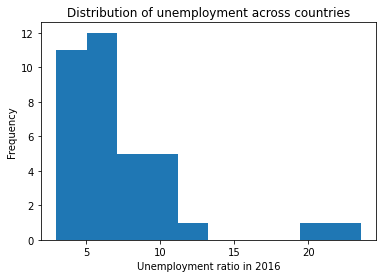

In [11]:
#look at the distribution of unemployment across each country
import matplotlib.pyplot as plt


plt.hist(clear_df['Unemploy_2016 (%)'])

plt.xlabel('Unemployment ratio in 2016')
plt.ylabel('Frequency')
plt.title('Distribution of unemployment across countries')

plt.show()

It is clear to me that there are some outliers in the unemployment percentages, just by looking at this. 

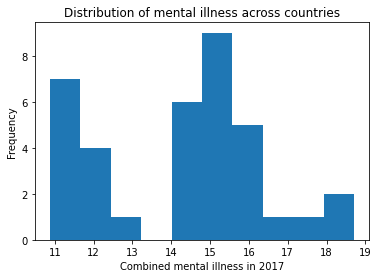

In [16]:
#lets check the distribution of mental illness prevalence in each country
plt.hist(clear_df['Combined_2017 (%)'])

plt.xlabel('Combined mental illness in 2017')
plt.ylabel('Frequency')
plt.title('Distribution of mental illness across countries')

plt.show()

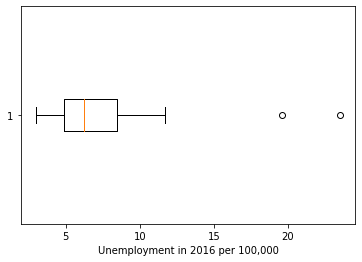

In [17]:
#another look at these two outliers 
plt.boxplot(clear_df['Unemploy_2016 (%)'], vert= False)

plt.xlabel('Unemployment in 2016 per 100,000')
#plt.ylabel('') No y axis

plt.show()

I can see that there are two heavy outliers in the data, but they are actually not errors. They are Greece and Spain, and after a quick google search I can see that they actually are some of the countries that are known for high unemployment rates. While I know that it would improve my statistical tests if I removed these two datapoints, I know that there is no justifiable reason to do so. 

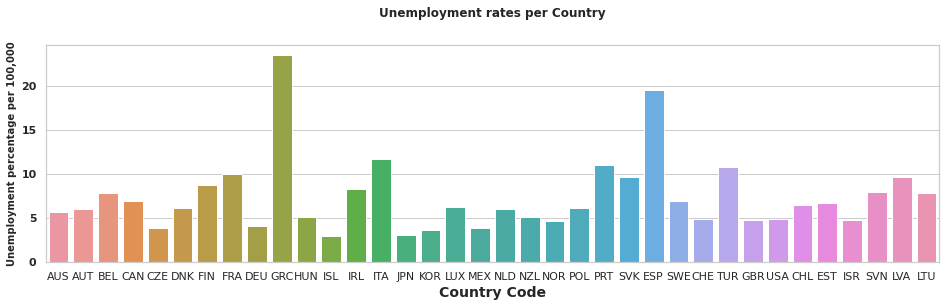

In [57]:
import seaborn as sns
sns.set_theme(style="whitegrid")
plt.figure(figsize=(16,4))
ax = sns.barplot(x="COUNTRIES", y="Unemploy_2016 (%)", data=clear_df)
ax.set_xlabel('Country Code', fontweight='bold', fontsize=14)
ax.set_ylabel('Unemployment percentage per 100,000', fontweight='bold', fontsize=10)
ax.set_title("Unemployment rates per Country", fontsize=12, fontweight='bold', x=.5, y=1.1)
ax.set_yticklabels([0, 5, 10, 15, 20], fontweight='bold')
plt.show()

In [ ]:
#lets start looking at the relationship between unemployment in 2016 and mental illness in 2017

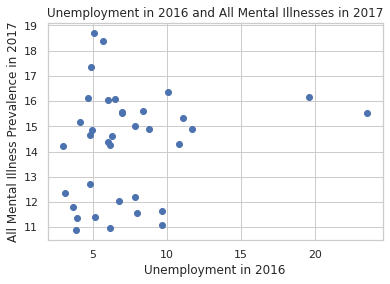

In [43]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots() 

#Plot the scatterplot#
plt.scatter(x = clear_df['Unemploy_2016 (%)'], y = clear_df['Combined_2017 (%)'])

ax.set_title('Unemployment in 2016 and All Mental Illnesses in 2017')
ax.set_xlabel('Unemployment in 2016')
ax.set_ylabel('All Mental Illness Prevalence in 2017')


plt.show()

My target variable is Combined Mental Illness in 2017 and my explanatory variable is the unemployment rate in 2016.
Null Hypothesis = there is no relationship between unemployment in 2017 and mental illness in 2017
Alternative Hypothesis = There is a relationship between unemployment in 2017 and mental illness in 2017


From the scatterplot, it is pretty clear to me that there is no relationship between unemployment in 2016 and mental illness in 2017

In [44]:
#lets just look at the correlation coefficient
import numpy as np

r = np.corrcoef(clear_df['Unemploy_2016 (%)'], clear_df['Combined_2017 (%)'])

print(r)

[[1.         0.18161845]
 [0.18161845 1.        ]]


|r| < 0.20, which means that this correlation, as suspected, is very weak. 

Finally, lets check out a model to investigate this relationship

In [47]:
clear_df.head()

,COUNTRIES,Healthcare_2016 ($ per capita),Population_2017,HDI_2016,GINI_year,Unemploy_2016 (%),Combined_2017 (%),ASD_2017 (%),ADHD_2017 (%),DEP_2017 (%),SCZ_2017 (%),ANX_2017 (%),ED_2017 (%),ETOH_2017 (%),SUICIDE_2017 (per 100.000),BD_2017 (%)
0,AUS,4565.873,24585000,0.938,0.330,5.710301,18.381283,0.636245,2.530677,4.623881,0.363326,6.584301,0.943081,1.511935,11.046885,1.142097
1,AUT,5139.924,8820000,0.906,0.284,6.014071,14.362136,0.624750,1.029146,3.260970,0.256958,5.341275,0.675112,1.824065,11.202157,0.939794
2,BEL,4666.226,11420000,0.915,0.266,7.833329,15.018094,0.627004,1.034081,4.109186,0.258073,5.212645,0.603869,1.465639,14.275319,0.947159
3,CAN,4698.016,36732000,0.922,0.307,6.991667,15.508529,0.935486,1.381819,3.988792,0.315588,5.178218,0.477304,1.617937,10.905195,0.716413
4,CZE,2627.698,10641000,0.885,0.253,3.952049,11.350703,0.478151,1.036547,2.675387,0.209989,3.443601,0.242373,2.097172,10.766628,0.721570


In [55]:
clear_df_edit = clear_df.rename(columns={"Unemploy_2016 (%)": "Unemployment_2016", "Combined_2017 (%)": "MI_2017"})
clear_df_edit

,COUNTRIES,Healthcare_2016 ($ per capita),Population_2017,HDI_2016,GINI_year,Unemployment_2016,MI_2017,ASD_2017 (%),ADHD_2017 (%),DEP_2017 (%),SCZ_2017 (%),ANX_2017 (%),ED_2017 (%),ETOH_2017 (%),SUICIDE_2017 (per 100.000),BD_2017 (%)
0,AUS,4565.873,24585000,0.938,0.330,5.710301,18.381283,0.636245,2.530677,4.623881,0.363326,6.584301,0.943081,1.511935,11.046885,1.142097
1,AUT,5139.924,8820000,0.906,0.284,6.014071,14.362136,0.624750,1.029146,3.260970,0.256958,5.341275,0.675112,1.824065,11.202157,0.939794
2,BEL,4666.226,11420000,0.915,0.266,7.833329,15.018094,0.627004,1.034081,4.109186,0.258073,5.212645,0.603869,1.465639,14.275319,0.947159
3,CAN,4698.016,36732000,0.922,0.307,6.991667,15.508529,0.935486,1.381819,3.988792,0.315588,5.178218,0.477304,1.617937,10.905195,0.716413
4,CZE,2627.698,10641000,0.885,0.253,3.952049,11.350703,0.478151,1.036547,2.675387,0.209989,3.443601,0.242373,2.097172,10.766628,0.721570
5,DNK,4774.269,5732000,0.928,0.263,6.180843,14.269328,0.728983,1.161140,3.291885,0.254017,5.314635,0.540025,1.730723,8.800280,1.005494
6,FIN,4024.490,5511000,0.918,0.259,8.811286,14.890242,0.633274,1.521056,4.792736,0.257444,3.752062,0.594938,2.605061,12.944947,1.005826
7,FRA,4844.017,64843000,0.899,0.291,10.056610,16.361245,0.581869,1.073783,4.253807,0.256238,6.626710,0.573755,1.418958,12.400298,0.958199
8,DEU,5550.175,82658000,0.934,0.294,4.122733,15.177606,0.639852,0.427186,3.959866,0.252269,6.540496,0.522066,1.806475,9.917417,0.776762
9,GRC,2198.044,10569000,0.868,0.333,23.541040,15.517001,0.622008,1.021921,4.185864,0.252701,5.790228,0.559324,1.124257,3.506254,0.948926


In [56]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

#Enter the model in the format Y ~ X

model = ols('MI_2017 ~ Unemployment_2016', data = clear_df_edit).fit()

#print the model summary 
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                MI_2017   R-squared:                       0.033
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     1.160
Date:                Tue, 12 Jan 2021   Prob (F-statistic):              0.289
Time:                        00:56:03   Log-Likelihood:                -77.234
No. Observations:                  36   AIC:                             158.5
Df Residuals:                      34   BIC:                             161.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            13.5955      0.72

As previously known, the p value (p =.289) is very large and there is no significant relationship between unemployment and mental illness.

Just out of curiousity, I would like to look and see if there seems to be a relationship between unemployment and any specific type of mental illness.

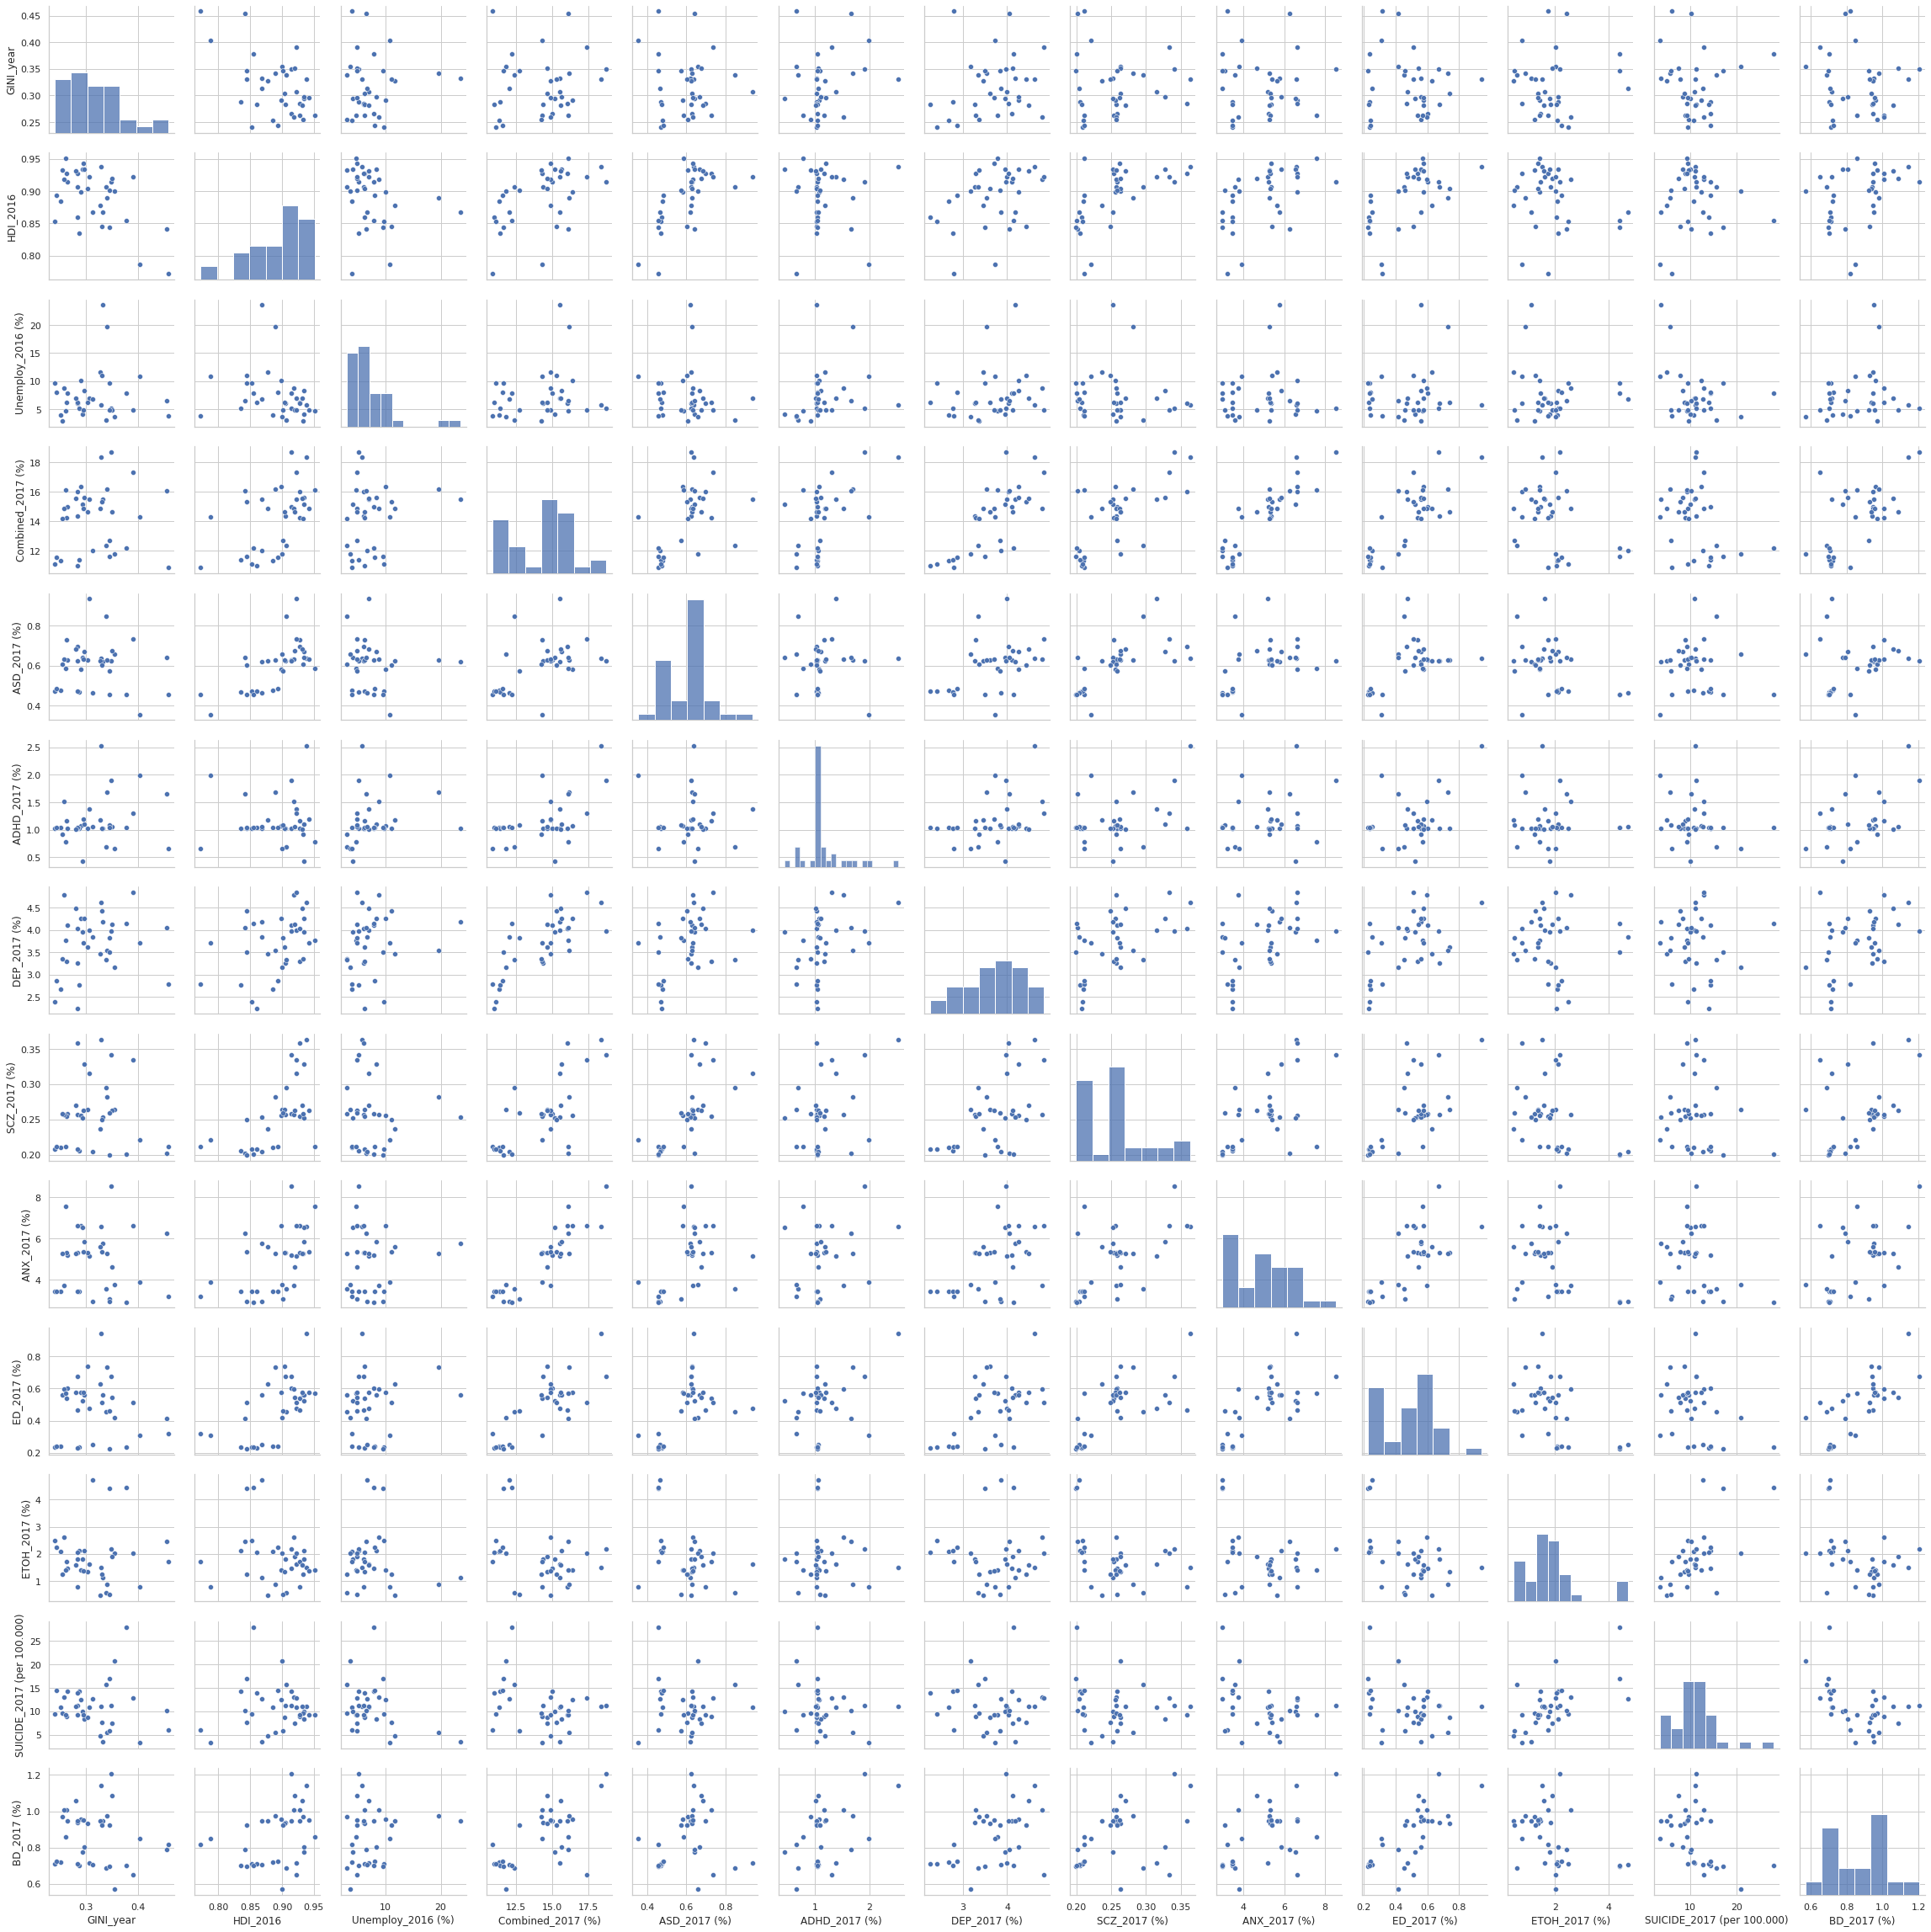

In [45]:
import seaborn as sns


to_plot = clear_df[['GINI_year', 'HDI_2016', 'Unemploy_2016 (%)', 'Combined_2017 (%)', 'ASD_2017 (%)', 'ADHD_2017 (%)', 'DEP_2017 (%)', 'SCZ_2017 (%)','ANX_2017 (%)', 'ED_2017 (%)', 'ETOH_2017 (%)','SUICIDE_2017 (per 100.000)','BD_2017 (%)' ]]

sns.pairplot(to_plot)

Interestingly, no correlation to be seen. 